In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

start = datetime(2018,1,1)
symbols_list = ['IAU','MRK','PEP','PG','MSFT','AAPL','COST','BIIB','WMT','NVO','UNH','NVDA','MC','ABBV','LIGHT','TTE']


In [7]:
symbols = []

for ticker in symbols_list:
    r = yf.download(ticker, start=start)
    r['Symbol'] = ticker
    symbols.append(r)

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date','Close','Symbol']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
df_pivot = df.pivot(index='Date', columns='Symbol', values='Close').reset_index()
df_pivot.head()

Symbol,Date,AAPL,ABBV,BIIB,COST,IAU,MC,MRK,MSFT,NVDA,NVO,PEP,PG,TTE,UNH,WMT
0,2018-01-02,43.064999,98.410004,334.170013,188.320007,25.340000,49.049999,53.645039,85.949997,49.837502,54.160000,118.059998,90.650002,55.869999,221.160004,98.589996
1,2018-01-03,43.057499,99.949997,339.850006,190.580002,25.280001,48.049999,53.568703,86.349998,53.117500,54.680000,117.750000,90.540001,56.439999,223.479996,99.449997
2,2018-01-04,43.257500,99.379997,339.989990,189.100006,25.420000,48.450001,54.437023,87.110001,53.397499,54.490002,118.330002,91.180000,57.410000,224.449997,99.540001
3,2018-01-05,43.750000,101.110001,342.489990,187.750000,25.379999,48.549999,54.379772,88.190002,53.849998,54.740002,118.669998,91.239998,57.770000,228.729996,100.129997
4,2018-01-08,43.587502,99.489998,329.649994,188.479996,25.379999,48.599998,54.064884,88.279999,55.500000,54.689999,117.989998,91.720001,57.779999,224.759995,101.610001


In [9]:
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
# del corr_df.index.name
corr_df.head(10)

/var/folders/qg/30kvbc515r13cnklb4ttgl9m0000gn/T/ipykernel_65220/1304817794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_pivot.corr(method='pearson')


Symbol,AAPL,ABBV,BIIB,COST,IAU,MC,MRK,MSFT,NVDA,NVO,PEP,PG,TTE,UNH,WMT
Symbol,,,,,,,,,,,,,,,
AAPL,1.000000,0.788483,-0.375934,0.956841,0.861203,0.284864,0.577200,0.971871,0.924481,0.879800,0.895387,0.894773,-0.227948,0.924559,0.886752
ABBV,0.788483,1.000000,-0.301690,0.798872,0.562055,0.290941,0.552028,0.690773,0.744108,0.884642,0.785057,0.590242,0.227772,0.904528,0.567955
BIIB,-0.375934,-0.301690,1.000000,-0.457036,-0.339334,0.202538,-0.311017,-0.354197,-0.285036,-0.322826,-0.442755,-0.458044,0.058714,-0.372084,-0.293378
COST,0.956841,0.798872,-0.457036,1.000000,0.802770,0.172344,0.690764,0.939480,0.889382,0.919489,0.954418,0.907559,-0.155220,0.949309,0.857102
IAU,0.861203,0.562055,-0.339334,0.802770,1.000000,-0.005785,0.543577,0.866609,0.762883,0.725909,0.764506,0.891433,-0.527877,0.707630,0.917101
MC,0.284864,0.290941,0.202538,0.172344,-0.005785,1.000000,-0.294550,0.296585,0.473379,0.207820,0.045653,-0.010717,0.327936,0.238937,0.063154
MRK,0.577200,0.552028,-0.311017,0.690764,0.543577,-0.294550,1.000000,0.550136,0.438437,0.750325,0.808093,0.698971,0.034550,0.688166,0.622651
MSFT,0.971871,0.690773,-0.354197,0.939480,0.866609,0.296585,0.550136,1.000000,0.936364,0.844820,0.874423,0.915385,-0.306055,0.871796,0.894845
NVDA,0.924481,0.744108,-0.285036,0.889382,0.762883,0.473379,0.438437,0.936364,1.000000,0.854947,0.791932,0.790250,-0.115276,0.836912,0.780026


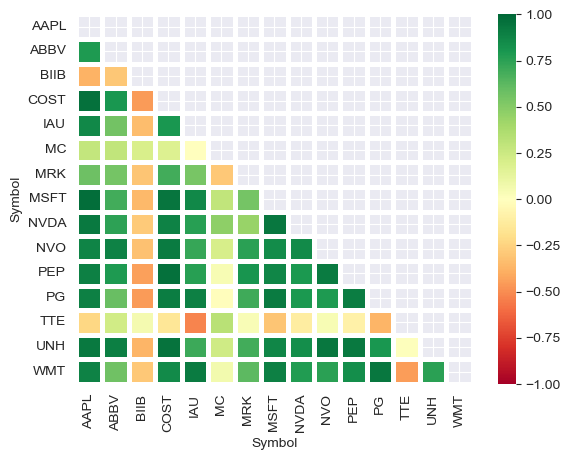

In [10]:
 #take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()